In [97]:
%matplotlib inline

import sys
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
import time
import datetime

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [98]:
# Reads the train.csv file into the df_train dataset, so that we can use Pandas for data exploration
df_train = pd.read_csv('train.csv', index_col='Id')
df_test = pd.read_csv('test.csv', index_col='Id')

(array([ 11.,  38.,  99., 232., 273., 218., 176., 104.,  93.,  58.,  42.,
         35.,  24.,  10.,  17.,   8.,   7.,   4.,   2.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667,
        610980.        , 634983.33333333, 658986.66666667, 682990.        ,
        706993.33333333, 730996.66666667, 755000.        ]),
 <BarContainer object of 30 artists>)

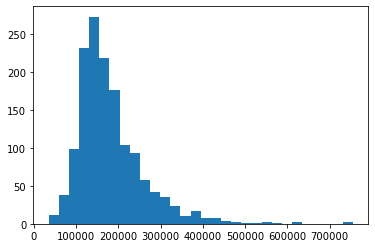

In [99]:
plt.hist(df_train.SalePrice, bins = 30)

In [100]:
# df_train = df_train[df_train["SalePrice"] < 600000]

In [101]:
# df_train.drop(df_train[df_train['SalePrice'] > 600000].index, inplace = True)

In [102]:
# df_train = df_train_c[df_train_c["SalePrice"] < 800000].copy()

In [103]:
# median_price = df_train.groupby('Neighborhood')['SalePrice'].agg(np.median)

In [104]:
# median_price

In [105]:
# df_train['median_price'] = df_train['Neighborhood'].map(median_price)
# df_test['median_price'] = df_test['Neighborhood'].map(median_price)

In [106]:
# del df_train['Neighborhood']
# del df_test['Neighborhood']

In [107]:
# df_train['median_price']

In [108]:
df_train.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [109]:
del df_train['LotFrontage']
del df_train['Street']
del df_train['Alley']
del df_train['LotShape']
del df_train['LandContour']
del df_train['Utilities']
del df_train['LandSlope']
del df_train['Exterior2nd']
del df_train['MasVnrArea']
del df_train['BsmtExposure']
del df_train['BsmtFinType1']
del df_train['BsmtFinSF1']
del df_train['BsmtFinType2']
del df_train['BsmtFinSF2']
del df_train['BsmtUnfSF']
del df_train['Heating']
del df_train['CentralAir']
del df_train['Electrical']
del df_train['1stFlrSF']
del df_train['2ndFlrSF']
del df_train['LowQualFinSF']
del df_train['BedroomAbvGr']
del df_train['KitchenAbvGr']
del df_train['GarageYrBlt']
del df_train['GarageFinish']
del df_train['GarageArea']
del df_train['PavedDrive']
del df_train['Fence']
del df_train['MiscFeature']
del df_train['SaleType']

In [110]:
del df_test['LotFrontage']
del df_test['Street']
del df_test['Alley']
del df_test['LotShape']
del df_test['LandContour']
del df_test['Utilities']
del df_test['LandSlope']
del df_test['Exterior2nd']
del df_test['MasVnrArea']
del df_test['BsmtExposure']
del df_test['BsmtFinType1']
del df_test['BsmtFinSF1']
del df_test['BsmtFinType2']
del df_test['BsmtFinSF2']
del df_test['BsmtUnfSF']
del df_test['Heating']
del df_test['CentralAir']
del df_test['Electrical']
del df_test['1stFlrSF']
del df_test['2ndFlrSF']
del df_test['LowQualFinSF']
del df_test['BedroomAbvGr']
del df_test['KitchenAbvGr']
del df_test['GarageYrBlt']
del df_test['GarageFinish']
del df_test['GarageArea']
del df_test['PavedDrive']
del df_test['Fence']
del df_test['MiscFeature']
del df_test['SaleType']

In [111]:
df_train['Age'] = 2021-df_train['YearBuilt']
df_test['Age'] = 2021-df_test['YearBuilt']

In [112]:
df_train['Remodel'] = np.where(df_train['YearRemodAdd']!= df_train['YearBuilt'], 'Yes', 'No')
df_test['Remodel'] = np.where(df_test['YearRemodAdd']!= df_test['YearBuilt'], 'Yes', 'No')

In [113]:
# df_train["LogSalePrice"] = np.log(df_train["SalePrice"])

In [114]:
del df_train['YearRemodAdd']
del df_test['YearRemodAdd']

In [115]:
df_train.loc[df_train.MasVnrType != "None", "MasVnrType"] = "Present"
df_test.loc[df_test.MasVnrType != "None", "MasVnrType"] = "Present"

In [116]:
df_train['TotalFullBath'] = df_train['BsmtFullBath']+df_train['FullBath']
df_test['TotalFullBath'] = df_test['BsmtFullBath']+df_test['FullBath']
df_train['TotalHalfBath'] = df_train['BsmtHalfBath']+df_train['HalfBath']
df_test['TotalHalfBath'] = df_test['BsmtHalfBath']+df_test['HalfBath']

In [117]:
del df_train['BsmtFullBath']
del df_train['FullBath']
del df_train['BsmtHalfBath']
del df_train['HalfBath']
del df_test['BsmtFullBath']
del df_test['FullBath']
del df_test['BsmtHalfBath']
del df_test['HalfBath']

In [118]:
df_train['OpendeckSF'] = df_train['WoodDeckSF']+df_train['OpenPorchSF']
df_test['OpendeckSF'] = df_test['WoodDeckSF']+df_test['OpenPorchSF']
df_train['CloseddeckSF'] = df_train['EnclosedPorch']+df_train['3SsnPorch']+df_train['ScreenPorch']
df_test['CloseddeckSF'] = df_test['EnclosedPorch']+df_test['3SsnPorch']+df_test['ScreenPorch']

In [119]:
del df_train['WoodDeckSF']
del df_train['OpenPorchSF']
del df_train['EnclosedPorch']
del df_train['3SsnPorch']
del df_train['ScreenPorch']
del df_test['WoodDeckSF']
del df_test['OpenPorchSF']
del df_test['EnclosedPorch']
del df_test['3SsnPorch']
del df_test['ScreenPorch']

In [120]:
df_train.loc[df_train.MSSubClass <= 50, "MSSubClass"] = 200
df_test.loc[df_test.MSSubClass <= 50, "MSSubClass"] = 200

In [121]:
df_train.loc[df_train.MSSubClass <= 75, "MSSubClass"] = 210
df_test.loc[df_test.MSSubClass <= 75, "MSSubClass"] = 210

In [122]:
df_train.loc[df_train.MSSubClass <= 85, "MSSubClass"] = 220
df_test.loc[df_test.MSSubClass <= 85, "MSSubClass"] = 220

In [123]:
df_train.loc[df_train.MSSubClass == 90, "MSSubClass"] = 230
df_test.loc[df_test.MSSubClass == 90, "MSSubClass"] = 230

In [124]:
df_train.loc[df_train.MSSubClass <= 150, "MSSubClass"] = 240
df_test.loc[df_test.MSSubClass <= 150, "MSSubClass"] = 240

In [125]:
df_train.loc[df_train.MSSubClass <= 180, "MSSubClass"] = 250
df_test.loc[df_test.MSSubClass <= 180, "MSSubClass"] = 250

In [126]:
df_train["MSSubClass"] = df_train.MSSubClass.apply(str)
df_test["MSSubClass"] = df_test.MSSubClass.apply(str)

In [127]:
del df_train['GarageType']
del df_test['GarageType']

In [128]:
df_train.loc[df_train.Condition1 == "Artery", "Condition1"] = "Negative"
df_test.loc[df_test.Condition1 == "Artery", "Condition1"] = "Negative"
df_train.loc[df_train.Condition1 == "RRNn", "Condition1"] = "Negative"
df_test.loc[df_test.Condition1 == "RRNn", "Condition1"] = "Negative"
df_train.loc[df_train.Condition1 == "RRAn", "Condition1"] = "Negative"
df_test.loc[df_test.Condition1 == "RRAn", "Condition1"] = "Negative"
df_train.loc[df_train.Condition1 == "RRNe", "Condition1"] = "Negative"
df_test.loc[df_test.Condition1 == "RRNe", "Condition1"] = "Negative"
df_train.loc[df_train.Condition1 == "RRAe", "Condition1"] = "Negative"
df_test.loc[df_test.Condition1 == "RRAe", "Condition1"] = "Negative"

df_train.loc[df_train.Condition2 == "Feedr", "Condition2"] = "Positive"
df_test.loc[df_test.Condition2 == "Feedr", "Condition2"] = "Positive"
df_train.loc[df_train.Condition2 == "PosN", "Condition2"] = "Positive"
df_test.loc[df_test.Condition2 == "PosN", "Condition2"] = "Positive"
df_train.loc[df_train.Condition2 == "PosA", "Condition2"] = "Positive"
df_test.loc[df_test.Condition2 == "PosA", "Condition2"] = "Positive"

In [129]:
df_train['NewCondition'] = df_train['Condition1']+df_train['Condition2']
df_test['NewCondition'] = df_test['Condition1']+df_test['Condition2']


In [130]:
del df_train['Condition1']
del df_test['Condition1']
del df_train['Condition2']
del df_test['Condition2']

In [131]:
df_train.loc[df_train.LotConfig == "FR3", "LotConfig"] = "FR2"
df_test.loc[df_test.LotConfig == "FR3", "LotConfig"] = "FR2"

In [132]:
df_train.loc[df_train.HouseStyle == "1Story", "HouseStyle"] = "1S"
df_test.loc[df_test.HouseStyle == "1Story", "HouseStyle"] = "1S"
df_train.loc[df_train.HouseStyle == "1.5Fin", "HouseStyle"] = "1S"
df_test.loc[df_test.HouseStyle == "1.5Fin", "HouseStyle"] = "1S"
df_train.loc[df_train.HouseStyle == "1.5Unf", "HouseStyle"] = "1S"
df_test.loc[df_test.HouseStyle == "1.5Unf", "HouseStyle"] = "1S"
df_train.loc[df_train.HouseStyle == "2Story", "HouseStyle"] = "2S"
df_test.loc[df_test.HouseStyle == "2Story", "HouseStyle"] = "2S"
df_train.loc[df_train.HouseStyle == "2.5Fin", "HouseStyle"] = "2S"
df_test.loc[df_test.HouseStyle == "2.5Fin", "HouseStyle"] = "2S"
df_train.loc[df_train.HouseStyle == "2.5Unf", "HouseStyle"] = "2S"
df_test.loc[df_test.HouseStyle == "2.5Unf", "HouseStyle"] = "2S"
df_train.loc[df_train.HouseStyle == "SFoyer", "HouseStyle"] = "S"
df_test.loc[df_test.HouseStyle == "SFoyer", "HouseStyle"] = "S"
df_train.loc[df_train.HouseStyle == "SLvl", "HouseStyle"] = "S"
df_test.loc[df_test.HouseStyle == "SLvl", "HouseStyle"] = "S"

In [133]:
df_train.loc[df_train.OverallQual == 10, "OverallQual"] = "OEX"
df_test.loc[df_test.OverallQual == 10, "OverallQual"] = "OEX"
df_train.loc[df_train.OverallQual == 9, "OverallQual"] = "OEX"
df_test.loc[df_test.OverallQual == 9, "OverallQual"] = "OEX"
df_train.loc[df_train.OverallQual == 8, "OverallQual"] = "OG"
df_test.loc[df_test.OverallQual == 8, "OverallQual"] = "OG"
df_train.loc[df_train.OverallQual == 7, "OverallQual"] = "OG"
df_test.loc[df_test.OverallQual == 7, "OverallQual"] = "OG"
df_train.loc[df_train.OverallQual == 6, "OverallQual"] = "OAVG"
df_test.loc[df_test.OverallQual == 6, "OverallQual"] = "OAVG"
df_train.loc[df_train.OverallQual == 5, "OverallQual"] = "OAVG"
df_test.loc[df_test.OverallQual == 5, "OverallQual"] = "OAVG"
df_train.loc[df_train.OverallQual == 4, "OverallQual"] = "OAVG"
df_test.loc[df_test.OverallQual == 4, "OverallQual"] = "OAVG"
df_train.loc[df_train.OverallQual == 3, "OverallQual"] = "OP"
df_test.loc[df_test.OverallQual == 3, "OverallQual"] = "OP"
df_train.loc[df_train.OverallQual == 2, "OverallQual"] = "OP"
df_test.loc[df_test.OverallQual == 2, "OverallQual"] = "OP"
df_train.loc[df_train.OverallQual == 1, "OverallQual"] = "OP"
df_test.loc[df_test.OverallQual == 1, "OverallQual"] = "OP"

In [134]:
df_train.loc[df_train.OverallCond == 10, "OverallCond"] = "OEX"
df_test.loc[df_test.OverallCond == 10, "OverallCond"] = "OEX"
df_train.loc[df_train.OverallCond == 9, "OverallCond"] = "OEX"
df_test.loc[df_test.OverallCond == 9, "OverallCond"] = "OEX"
df_train.loc[df_train.OverallCond == 8, "OverallCond"] = "OG"
df_test.loc[df_test.OverallCond == 8, "OverallCond"] = "OG"
df_train.loc[df_train.OverallCond == 7, "OverallCond"] = "OG"
df_test.loc[df_test.OverallCond == 7, "OverallCond"] = "OG"
df_train.loc[df_train.OverallCond == 6, "OverallCond"] = "OAVG"
df_test.loc[df_test.OverallCond == 6, "OverallCond"] = "OAVG"
df_train.loc[df_train.OverallCond == 5, "OverallCond"] = "OAVG"
df_test.loc[df_test.OverallCond == 5, "OverallCond"] = "OAVG"
df_train.loc[df_train.OverallCond == 4, "OverallCond"] = "OAVG"
df_test.loc[df_test.OverallCond == 4, "OverallCond"] = "OAVG"
df_train.loc[df_train.OverallCond == 3, "OverallCond"] = "OP"
df_test.loc[df_test.OverallCond == 3, "OverallCond"] = "OP"
df_train.loc[df_train.OverallCond == 2, "OverallCond"] = "OP"
df_test.loc[df_test.OverallCond == 2, "OverallCond"] = "OP"
df_train.loc[df_train.OverallCond == 1, "OverallCond"] = "OP"
df_test.loc[df_test.OverallCond == 1, "OverallCond"] = "OP"

In [135]:
df_train["NewOverall"] = df_train.OverallQual + df_train.OverallCond
df_test["NewOverall"] = df_test.OverallQual + df_test.OverallCond

In [136]:
del df_train["OverallQual"]
del df_train["OverallCond"]
del df_test["OverallQual"]
del df_test["OverallCond"]

In [137]:
df_train["NewRoof"] = df_train.RoofStyle + df_train.RoofMatl
df_test["NewRoof"] = df_test.RoofStyle + df_test.RoofMatl

In [138]:
del df_train["RoofStyle"]
del df_test["RoofStyle"]
del df_train["RoofMatl"]
del df_test["RoofMatl"]

In [139]:
df_train["NewExter"] = df_train.ExterQual + df_train.ExterCond
df_test["NewExter"] = df_test.ExterQual + df_test.ExterCond

In [140]:
del df_train["ExterQual"]
del df_test["ExterQual"]
del df_train["ExterCond"]
del df_test["ExterCond"]

In [141]:
df_train["NewBase"] = df_train.BsmtQual + df_train.BsmtCond
df_test["NewBase"] = df_test.BsmtQual + df_test.BsmtCond

In [142]:
del df_train["BsmtQual"]
del df_test["BsmtQual"]
del df_train["BsmtCond"]
del df_test["BsmtCond"]

In [143]:
df_train.loc[df_train.Functional == "Typ", "Functional"] = 1
df_test.loc[df_test.Functional == "Typ", "Functional"] = 1
df_train.loc[df_train.Functional == "Min1", "Functional"] = 2
df_test.loc[df_test.Functional == "Min1", "Functional"] = 2
df_train.loc[df_train.Functional == "Min2", "Functional"] = 2
df_test.loc[df_test.Functional == "Min2", "Functional"] = 2
df_train.loc[df_train.Functional == "Mod", "Functional"] = 3
df_test.loc[df_test.Functional == "Mod", "Functional"] = 3
df_train.loc[df_train.Functional == "Maj1", "Functional"] = 4
df_test.loc[df_test.Functional == "Maj1", "Functional"] = 4
df_train.loc[df_train.Functional == "Maj2", "Functional"] = 4
df_test.loc[df_test.Functional == "Maj2", "Functional"] = 4
df_train.loc[df_train.Functional == "Sev", "Functional"] = 5
df_test.loc[df_test.Functional == "Sev", "Functional"] = 5
df_train.loc[df_train.Functional == "Sal", "Functional"] = 5
df_test.loc[df_test.Functional == "Sal", "Functional"] = 5


In [144]:
df_train["NewGarage"] = df_train.GarageQual + df_train.GarageCond
df_test["NewGarage"] = df_test.GarageQual + df_test.GarageCond

In [145]:
del df_train["GarageQual"]
del df_test["GarageQual"]
del df_train["GarageCond"]
del df_test["GarageCond"]

In [146]:
df_train["MoSold"] = df_train.MoSold.apply(str)
df_train["YrSold"] = df_train.YrSold.apply(str)
df_test["MoSold"] = df_test.MoSold.apply(str)
df_test["YrSold"] = df_test.YrSold.apply(str)

In [147]:
df_train["NewDateSold"] = df_train['MoSold'].astype(str) + "-" + "1"+ "-" + df_train['YrSold'].astype(str)
df_test["NewDateSold"] =  df_test['MoSold'].astype(str) + "-" + "1"+ "-" + df_test['YrSold'].astype(str)

In [148]:
df_train["NewDateSold"] = pd.to_datetime(df_train["NewDateSold"])
df_test["NewDateSold"] = pd.to_datetime(df_test["NewDateSold"])

In [149]:
del df_train['MoSold']
del df_test['MoSold']
del df_train['YrSold']
del df_test['YrSold']

In [150]:
df_train.loc[df_train.SaleCondition == "AdjLand", "SaleCondition"] = "Normal"
df_test.loc[df_test.SaleCondition == "AdjLand", "SaleCondition"] = "Normal"
df_train.loc[df_train.SaleCondition == "Alloca", "SaleCondition"] = "Normal"
df_test.loc[df_test.SaleCondition == "Alloca", "SaleCondition"] = "Normal"
df_train.loc[df_train.SaleCondition == "Partial", "SaleCondition"] = "Normal"
df_test.loc[df_test.SaleCondition == "Partial", "SaleCondition"] = "Normal"
df_train.loc[df_train.SaleCondition == "Family", "SaleCondition"] = "Abnorml"
df_test.loc[df_test.SaleCondition == "Family", "SaleCondition"] = "Abnorml"

In [151]:
df_train.loc[df_train.SaleCondition == "Normal", "SaleCondition"] = 1
df_test.loc[df_test.SaleCondition == "Normal", "SaleCondition"] = 1
df_train.loc[df_train.SaleCondition == "Abnorml", "SaleCondition"] = 0
df_test.loc[df_test.SaleCondition == "Abnorml", "SaleCondition"] = 0

In [152]:
df_train['NewBase'] = df_train.NewBase.fillna('NANA')
df_test['NewBase'] = df_test.NewBase.fillna('NANA')

In [153]:
df_train['NewGarage'] = df_train.NewGarage.fillna('NANA')
df_test['NewGarage'] = df_test.NewGarage.fillna('NANA')

In [154]:
del df_train['PoolQC']
del df_test['PoolQC']

In [155]:
df_train['FireplaceQu'] = df_train.FireplaceQu.fillna('NA')
df_test['FireplaceQu'] = df_test.FireplaceQu.fillna('NA')

In [156]:
df_test['MSZoning'] = df_test.MSZoning.fillna('RL')
df_test['Exterior1st'] = df_test.Exterior1st.fillna('VinylSd')
df_test['TotalBsmtSF'] = df_test.TotalBsmtSF.fillna(0)
df_test['KitchenQual'] = df_test.KitchenQual.fillna('TA')
df_test['Functional'] = df_test.Functional.fillna(1)
df_test['GarageCars'] = df_test.GarageCars.fillna(2)
df_test['TotalFullBath'] = df_test.TotalFullBath.fillna(3)
df_test['TotalHalfBath'] = df_test.TotalHalfBath.fillna(1)

In [157]:
df_train["Functional"] = df_train.Functional.apply(int)
df_test["Functional"] = df_test.Functional.apply(int)

In [158]:
df_test_miss = df_test.copy()

In [159]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MSSubClass     1460 non-null   object        
 1   MSZoning       1460 non-null   object        
 2   LotArea        1460 non-null   int64         
 3   LotConfig      1460 non-null   object        
 4   Neighborhood   1460 non-null   object        
 5   BldgType       1460 non-null   object        
 6   HouseStyle     1460 non-null   object        
 7   YearBuilt      1460 non-null   int64         
 8   Exterior1st    1460 non-null   object        
 9   MasVnrType     1460 non-null   object        
 10  Foundation     1460 non-null   object        
 11  TotalBsmtSF    1460 non-null   int64         
 12  HeatingQC      1460 non-null   object        
 13  GrLivArea      1460 non-null   int64         
 14  KitchenQual    1460 non-null   object        
 15  TotRmsAbvGrd   1460 n

In [160]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MSSubClass     1459 non-null   object        
 1   MSZoning       1459 non-null   object        
 2   LotArea        1459 non-null   int64         
 3   LotConfig      1459 non-null   object        
 4   Neighborhood   1459 non-null   object        
 5   BldgType       1459 non-null   object        
 6   HouseStyle     1459 non-null   object        
 7   YearBuilt      1459 non-null   int64         
 8   Exterior1st    1459 non-null   object        
 9   MasVnrType     1459 non-null   object        
 10  Foundation     1459 non-null   object        
 11  TotalBsmtSF    1459 non-null   float64       
 12  HeatingQC      1459 non-null   object        
 13  GrLivArea      1459 non-null   int64         
 14  KitchenQual    1459 non-null   object        
 15  TotRmsAbvGrd   145

In [161]:
# from sklearn.impute import SimpleImputer

# sorted_indexes = np.argsort(df_test_miss.isnull().sum(axis=0)).values

# for i in sorted_indexes:
    
#     feature_i = df_test_miss.iloc[:, i]
#     tmp_df = pd.concat([df_test_miss.iloc[:, df_test_miss.columns != i], pd.DataFrame(df_test)], axis=1)

#     imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')  
#     tmp_df_mean = imp_mean.fit_transform(tmp_df)  

#     y_train = feature_i[feature_i.notnull()]  
#     y_test = feature_i[feature_i.isnull()]   
#     x_train = tmp_df_mean[y_train.index, :] 
#     x_test = tmp_df_mean[y_test.index, :]  

    
#     rfc = RandomForestRegressor(n_estimators=100)
#     rfc = rfc.fit(x_train, y_train)
#     y_predict = rfc.predict(x_test)

    
#     df_test_miss.loc[df_test_miss.iloc[:, i].isnull(), i] = y_predict



In [162]:
# df_test.Exterior1st.value_counts()

In [163]:
# temp_train = pd.read_csv('train.csv', index_col='Id')
# temp_test = pd.read_csv('test.csv', index_col='Id')

In [164]:
# df_train['GrLivArea'] = temp_train['GrLivArea']
# df_test['GrLivArea'] = temp_test['GrLivArea']

In [165]:
# df_test[df_test.TotalFullBath.isnull()== True]

In [166]:
# df_train[ (df_train.MSSubClass== '210') & (df_train.Neighborhood== 'IDOTRR') & (df_train.LotArea> 14000)]

In [167]:
# df_train[ (df_train.MSSubClass== '200') & (df_train.Neighborhood== 'Mitchel') & (df_train.LotArea> 14000)]

In [168]:
# ohe = OneHotEncoder(categories='auto')
# feature_arr = ohe.fit_transform(df_train[['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood',
#        'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType', 'Foundation',
#         'HeatingQC', 'KitchenQual',  'Functional',
#        'Fireplaces', 'SaleCondition',  
#         'NewCondition', 'NewOverall', 'NewRoof',
#        'NewExter', 'NewBase', 'NewGarage']]).toarray()

# feature_labels = ohe.categories_
# colname = []
# for i in feature_labels:
#     colname.append(list(i.ravel()))
# colname = list(np.concatenate(colname).flat)
# features = pd.DataFrame(feature_arr, columns=colname)

# new_train = pd.concat([df_train,features],axis = 1)


In [169]:
# df_test[['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood',
#        'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType', 'Foundation',
#         'HeatingQC', 'KitchenQual',  'Functional',
#        'Fireplaces', 'SaleCondition',  
#         'NewCondition', 'NewOverall', 'NewRoof',
#        'NewExter', 'NewBase', 'NewGarage']] = df_test[['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood',
#        'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType', 'Foundation',
#         'HeatingQC', 'KitchenQual',  'Functional',
#        'Fireplaces', 'SaleCondition',  
#         'NewCondition', 'NewOverall', 'NewRoof',
#        'NewExter', 'NewBase', 'NewGarage']].astype(str)

In [170]:
# feature_arr = ohe.transform(df_test[['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood',
#        'BldgType', 'HouseStyle', 'Exterior1st', 'MasVnrType', 'Foundation',
#         'HeatingQC', 'KitchenQual',  'Functional',
#        'Fireplaces', 'SaleCondition',  
#         'NewCondition', 'NewOverall', 'NewRoof',
#        'NewExter', 'NewBase', 'NewGarage']]).toarray()
# features = pd.DataFrame(feature_arr, columns=feature_labels)


# new_test = pd.concat([df_test,features],axis = 1)

In [171]:
new_train = pd.get_dummies(df_train)
new_test = pd.get_dummies(df_test)

In [172]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Columns: 187 entries, LotArea to NewGarage_TATA
dtypes: datetime64[ns](1), int64(16), uint8(170)
memory usage: 447.7 KB


In [173]:
new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Columns: 181 entries, LotArea to NewGarage_TATA
dtypes: datetime64[ns](1), float64(4), int64(11), uint8(165)
memory usage: 428.9 KB


In [174]:
{i for i in new_train.columns}-{i for i in new_test.columns}

{'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'NewCondition_FeedrRRAe',
 'NewCondition_FeedrRRAn',
 'NewCondition_FeedrRRNn',
 'NewExter_ExGd',
 'NewGarage_ExEx',
 'NewGarage_ExTA',
 'NewOverall_OEXOEX',
 'NewOverall_OGOP',
 'NewRoof_FlatCompShg',
 'NewRoof_FlatMembran',
 'NewRoof_FlatMetal',
 'NewRoof_GableRoll',
 'NewRoof_GableWdShngl',
 'NewRoof_HipClyTile',
 'NewRoof_HipWdShngl',
 'NewRoof_ShedWdShake',
 'SalePrice'}

In [175]:
{i for i in new_test.columns} - {i for i in new_train.columns}

{'NewBase_ExPo',
 'NewBase_FaGd',
 'NewBase_TAPo',
 'NewCondition_FeedrArtery',
 'NewCondition_PosAPositive',
 'NewExter_FaGd',
 'NewExter_FaPo',
 'NewExter_GdEx',
 'NewExter_GdFa',
 'NewGarage_GdEx',
 'NewGarage_PoFa',
 'NewGarage_TAPo',
 'NewRoof_ShedWdShngl'}

In [176]:
for i in {i for i in new_train.columns}-{i for i in new_test.columns}:
    new_test[i]=0

In [177]:
for i in {i for i in new_test.columns}-{i for i in new_train.columns}:
    new_train[i]=0

In [178]:
new_labels = pd.DataFrame()
new_labels["SalePrice"] = new_train["SalePrice"]
# new_labels["LogSalePrice"] = new_train["LogSalePrice"]

In [179]:
del new_train["SalePrice"]
del new_test["SalePrice"]
# del new_train["LogSalePrice"]
# del new_test["LogSalePrice"]

In [180]:
new_train.NewDateSold = new_train.NewDateSold.apply(lambda x: x.date())
new_test.NewDateSold = new_test.NewDateSold.apply(lambda x: x.date())

In [181]:
# min(new_train.NewDateSold)
# max(new_train.NewDateSold)
# min(new_test.NewDateSold)
# max(new_test.NewDateSold)

In [182]:
new_train.NewDateSold = datetime.date(2010,8,1)-new_train.NewDateSold
new_test.NewDateSold = datetime.date(2010,8,1)-new_test.NewDateSold

In [183]:
new_train.NewDateSold = (new_train.NewDateSold / np.timedelta64(1, 'D')).astype(int)
new_test.NewDateSold = (new_test.NewDateSold / np.timedelta64(1, 'D')).astype(int)

In [184]:
(new_test.NewDateSold.iloc[2])

153

In [185]:
np.random.seed(0) # Using this to ensure repeatable results - May remove it before production

df_data_array = np.asarray(new_train)
df_labels_array = np.asarray(new_labels["SalePrice"])

dataset_size = df_data_array.shape[0]

shuffle = np.random.permutation(np.arange(dataset_size))
X, Y = df_data_array[shuffle], df_labels_array[shuffle]

split = int(dataset_size*0.8) # 80/20 split between train and dev data

train_data, train_labels = X[:split], Y[:split]
dev_data, dev_labels = X[split:], Y[split:]

In [186]:
# np.log(85000)

In [187]:
# from sklearn.decomposition import PCA

# # pca = PCA(n_components = train_data.shape[1])
# pca = PCA(n_components = 6)
# components = pca.fit_transform(train_data)

# df = pd.DataFrame(data = components)

# components_d = pca.transform(dev_data)

# df1 = pd.DataFrame(data = components_d)
# # var = []

# # for i in range(train_data.shape[1]):
# #     var.append(sum(pca.explained_variance_ratio_[:i+1]))  

# # plt.figure(figsize = (10,2))
# # print('\n')
# # plt.plot(range(1,train_data.shape[1]+1),var)
# # plt.xlabel("# of first principal components")
# # plt.ylabel("Fraction of the total variance explained")
# # plt.title("Principal components vs. Fraction of total variance")
# # plt.xticks(range(1, 250,5))
# # plt.show()

In [188]:
from xgboost import XGBRegressor

In [189]:
lr = LinearRegression(fit_intercept=True)
# lr = RandomForestRegressor()
# lr = XGBRegressor()

lr.fit(train_data,np.log(train_labels))
# lr.fit(df,np.log(train_labels))
predictions = lr.predict(dev_data)
# predictions = lr.predict(df1)

# for i in np.where(predictions > 15):
#     predictions[i] = 13.12

# for i in np.where(predictions < 5):
#     predictions[i] = 11.35



# error_dev = lr.score(dev_data, dev_labels)
# error_train = lr.score(train_data,train_labels)


rmse = (mean_squared_error(dev_labels, np.exp(predictions)))**(1/2)
rmse_log = (mean_squared_log_error(dev_labels, np.exp(predictions)))**(1/2)
# print (f'R^2 on train data {error_train:.5f}')
# print (f'R^2 on dev data {error_dev:.5f}')
print (f'RMSE {rmse:.5f}')
print (f'RMSE_LOG {rmse_log:.5f}')


RMSE 20563.32348
RMSE_LOG 0.11011


In [190]:
# sub_df = pd.DataFrame(np.exp(predictions_submit) , columns = 'SalePrice')

In [191]:
predictions_submit = lr.predict(new_test)

sub_df = pd.DataFrame(df_test.index, columns = ['Id'])
sub_df['SalePrice'] = np.exp(predictions_submit)
sub_df = sub_df.set_index('Id')

sub_df.to_csv('submission.csv')

In [ ]:
# df_train.columns

In [ ]:
# null_values = df_train.isnull().sum()
# print(null_values)

In [ ]:
# null_values = df_test.isnull().sum()
# print(null_values)

In [ ]:
# df_train['BldgType'].replace(['Twnhs', 'Duplex', '2fmCon'], ['TwnhsI','Duplx','2FmCon'],inplace=True)
# df_test['BldgType'].replace(['Twnhs', 'Duplex', '2fmCon'], ['TwnhsI','Duplx','2FmCon'],inplace=True)

In [ ]:
# df_train['FireplaceQu'] = df_train.FireplaceQu.fillna('NA')
# df_test['FireplaceQu'] = df_test.FireplaceQu.fillna('NA')

# df_train['LotFrontage'] = df_train.LotFrontage.fillna(70)
# df_test['LotFrontage'] = df_test.LotFrontage.fillna(70)

# df_test['Utilities'] = df_test.Utilities.fillna('NoSeWa')

# df_test['MSZoning'] = df_test.MSZoning.fillna('RL')

# df_test['MasVnrType'] = df_test.MasVnrType.fillna('None')
# df_train['MasVnrType'] = df_train.MasVnrType.fillna('None')
# df_test['MasVnrArea'] = df_test.MasVnrArea.fillna(0)
# df_train['MasVnrArea'] = df_train.MasVnrArea.fillna(0)

# df_test['Exterior1st'] = df_test.Exterior1st.fillna('BrkFace')
# df_test['Exterior2nd'] = df_test.Exterior2nd.fillna('BrkFace')


# df_test['BsmtQual'] = df_test.BsmtQual.fillna('NA')
# df_train['BsmtQual'] = df_train.BsmtQual.fillna('NA')
# df_test['BsmtCond'] = df_test.BsmtCond.fillna('NA')
# df_train['BsmtCond'] = df_train.BsmtCond.fillna('NA')

# df_test['BsmtExposure'] = df_test.BsmtExposure.fillna('NA')
# df_train['BsmtExposure'] = df_train.BsmtExposure.fillna('NA')
# df_test['BsmtFinType1'] = df_test.BsmtFinType1.fillna('NA')
# df_train['BsmtFinType1'] = df_train.BsmtFinType1.fillna('NA')

# df_test['BsmtFinType2'] = df_test.BsmtFinType2.fillna('NA')
# df_train['BsmtFinType2'] = df_train.BsmtFinType2.fillna('NA')
# df_test['BsmtFinSF1'] = df_test.BsmtFinSF1.fillna(0)
# df_train['BsmtFinSF1'] = df_train.BsmtFinSF1.fillna(0)


# df_test['BsmtFinSF2'] = df_test.BsmtFinSF2.fillna(0)
# df_train['BsmtFinSF2'] = df_train.BsmtFinSF2.fillna(0)

# df_test['BsmtUnfSF'] = df_test.BsmtUnfSF.fillna(0)

# df_test['TotalBsmtSF'] = df_test.TotalBsmtSF.fillna(0)

# df_train['Electrical'] = df_train.Electrical.fillna('SBrkr')

# df_test['KitchenQual'] = df_test.KitchenQual.fillna('TA')
# df_test['Functional'] = df_test.Functional.fillna('Typ')



In [ ]:
# df_train['GarageType'] = df_train.GarageType.fillna('NA')
# df_test['GarageType'] = df_test.GarageType.fillna('NA')

# df_train['GarageCond'] = df_train.GarageCond.fillna('NA')
# df_test['GarageCond'] = df_test.GarageCond.fillna('NA')

# df_test['GarageCars'] = df_test.GarageCars.fillna(0)


In [ ]:
# def oencoder(df, column_name, cat_list):
#     encoder = OrdinalEncoder(categories=[cat_list], handle_unknown = "use_encoded_value", unknown_value = -1)
#     df[column_name] = encoder.fit_transform(df.loc[:,[column_name]])

#     return
    

In [ ]:
# tobe_enc = {
#     'LotShape':['IR3','IR2','IR1','Reg'],
#     'LandContour':['Low','HLS','Bnk','Lvl'],
#     'Utilities':['ELO','NoSeWa','NoSewr','AllPub'],
#     'LandSlope':['Gtl','Mod','Sev'],
#     'ExterQual':['Po','Fa','TA','Gd','Ex'],
#     'ExterCond':['Po','Fa','TA','Gd','Ex'],
#     'HeatingQC':['Po','Fa','TA','Gd','Ex'],
#     'KitchenQual':['Po','Fa','TA','Gd','Ex'],
#     'Functional':['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
#     'PavedDrive':['N','P','Y'],
#     'BldgType':['TwnhsI','TwnhsE','Duplx','2FmCon','1Fam'],
#     'BsmtQual':['NA','Po','Fa','TA','Gd','Ex'],
#     'BsmtCond':['NA','Po','Fa','TA','Gd','Ex'],
#     'BsmtExposure':['NA','No','Mn','Av','Gd'],
#     'BsmtFinType1':['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
#     'BsmtFinType2':['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
#     'CentralAir':['N','Y'],
#     'Electrical':['Mix','FuseP','FuseF','FuseA','SBrkr'],
#     'FireplaceQu':['NA','Po','Fa','TA','Gd','Ex']  
# }

In [ ]:
# for i in tobe_enc:
#     oencoder(df_train, i, tobe_enc[i])

In [ ]:
# for i in tobe_enc:
#     oencoder(df_test, i, tobe_enc[i])

In [ ]:
# sns.histplot(data=df_train, x="SalePrice")
# plt.show()

In [ ]:
# df_train[df_train.GrLivArea > 4300]

In [ ]:
# df_train[df_train.SalePrice > 600000]

In [ ]:
# df_train.drop(df_train[df_train.SalePrice > 740000].index, inplace = True)

In [ ]:
# df_train_cluster = df_train.copy()
# num = 3
# km = KMeans(n_clusters = num)
# kmtrain = km.fit_predict(df_train_cluster)

In [ ]:
# oneenc = OneHotEncoder()

In [ ]:
# new_df_train = df_train
# model = oneenc.fit(new_df_train)
# new_train = model.transform(new_df_train)

In [ ]:
# new_test = model.transform(df_test)

In [ ]:
# new_train = pd.get_dummies(df_train)
# new_test = pd.get_dummies(df_test)

In [ ]:
# print(new_train.shape)
# print(new_test.shape)

In [ ]:
# for i in {i for i in new_train.columns}-{i for i in new_test.columns}:
#     new_test[i]=0

In [ ]:
# del new_test['SalePrice']

In [ ]:
# new_train.head()

In [ ]:
# null_values = new_train.isnull().sum()
# print(null_values)

In [ ]:
# null_values = new_test.isnull().sum()
# print(null_values)

In [ ]:
# new_train['LotFrontage'].describe()
# new_train['GarageYrBlt'].describe()
# new_train['MasVnrArea'].describe()

In [ ]:
# del new_train['GarageYrBlt']
# del new_test['GarageYrBlt']

In [ ]:
# new_train['LotFrontage'] = new_train.LotFrontage.fillna(70)
# new_test['LotFrontage'] = new_test.LotFrontage.fillna(70)

In [ ]:
# new_test[new_test['BsmtFinSF1'].isnull()]
# new_test['BsmtFinSF1'].describe()

In [ ]:
# new_train['MasVnrArea']=new_train.MasVnrArea.fillna(0)
# new_test['MasVnrArea']=new_test.MasVnrArea.fillna(0)

In [ ]:
# new_test['BsmtFinSF1'] = new_test.BsmtFinSF1.fillna(0)
# new_test['BsmtFinSF2'] = new_test.BsmtFinSF2.fillna(0)
# new_test['BsmtUnfSF'] = new_test.BsmtUnfSF.fillna(0)
# new_test['TotalBsmtSF'] = new_test.TotalBsmtSF.fillna(0)
# new_test['BsmtFullBath'] = new_test.BsmtFullBath.fillna(0)
# new_test['BsmtHalfBath'] = new_test.BsmtHalfBath.fillna(0)
# new_test['GarageCars'] = new_test.GarageCars.fillna(0)
# new_test['GarageArea'] = new_test.GarageArea.fillna(0)

In [ ]:
# new_train_cluster = new_train.copy()
# del new_train_cluster['SalePrice']

In [ ]:
# new_train_cluster['cluster']=kmtrain

In [ ]:
# {i for i in km.feature_names_in_}-{i for i in new_test.columns}

In [ ]:
# kmtest = km.predict(new_test)

In [ ]:
# new_test_cluster = new_test.copy()
# new_test_cluster['cluster']=kmtest

In [ ]:
# for i in range(num):
#     globals()['cluster_{}'.format(i)]  = new_train_cluster[new_train_cluster['cluster']==i].copy()

In [ ]:
# for i in range(num):
#     print(len(globals()['cluster_{}'.format(i)].index))
#     globals()['cluster_{}'.format(i)] = shuffle(globals()['cluster_{}'.format(i)])

In [ ]:
# new_train.loc[cluster_1.index]['SalePrice']

In [ ]:
# cluster_0_train = cluster_0[:373]
# cluster_1_train = cluster_1[:3]
# cluster_2_train = cluster_2[:705]
# cluster_3_train = cluster_3[:14]

# cluster_0_tlabel = new_train.loc[cluster_0.index]['SalePrice'].copy()[:373]
# cluster_1_tlabel = new_train.loc[cluster_1.index]['SalePrice'].copy()[:3]
# cluster_2_tlabel = new_train.loc[cluster_2.index]['SalePrice'].copy()[:705]
# cluster_3_tlabel = new_train.loc[cluster_3.index]['SalePrice'].copy()[:14]

# cluster_0_dev = cluster_0[373:]
# cluster_1_dev = cluster_1[3:]
# cluster_2_dev = cluster_2[705:]
# cluster_3_dev = cluster_3[14:]

# cluster_0_dlabel = new_train.loc[cluster_0.index]['SalePrice'].copy()[373:]
# cluster_1_dlabel = new_train.loc[cluster_1.index]['SalePrice'].copy()[3:]
# cluster_2_dlabel = new_train.loc[cluster_2.index]['SalePrice'].copy()[705:]
# cluster_3_dlabel = new_train.loc[cluster_3.index]['SalePrice'].copy()[14:]


In [ ]:
# rg = RandomForestRegressor()
# # model_0 = rg.fit(cluster_0_train,cluster_0_label)

In [ ]:
# for i in range(num):
#     globals()['model_{}'.format(i)] = rg.fit(globals()['cluster_{}_train'.format(i)],globals()['cluster_{}_tlabel'.format(i)])
    

In [ ]:
# pred_2 = model_2.predict(cluster_2_dev)

In [ ]:
# len(pred_2)

In [ ]:
# len(cluster_2_dlabel)

In [ ]:
# error_dev_2 = model_2.score(cluster_2_dev, cluster_2_dlabel)
# error_train_2 = model_2.score(cluster_2_train, cluster_2_tlabel)
# rmse = (mean_squared_error(cluster_2_dlabel, pred_2))**(1/2)
# rmse_log = (mean_squared_log_error(cluster_2_dlabel, pred_2))**(1/2)
# print (f'R^2 on train data {error_train_2:.5f}')
# print (f'R^2 on dev data {error_dev_2:.5f}')
# print (f'RMSE {rmse:.5f}')
# print (f'RMSE_LOG {rmse_log:.5f}')

In [ ]:
# from sklearn.svm import SVR

In [ ]:
# sv = SVR()
# model_0s = sv.fit(cluster_0_train,cluster_0_tlabel)
# pred_0s = model_0s.predict(cluster_0_dev)
# error_dev_0s = model_0s.score(cluster_0_dev, cluster_0_dlabel)
# error_train_0s = model_0s.score(cluster_0_train, cluster_0_tlabel)

In [ ]:
# rmse = (mean_squared_error(cluster_0_dlabel, pred_0s))**(1/2)
# rmse_log = (mean_squared_log_error(cluster_0_dlabel, pred_0s))**(1/2)
# print (f'R^2 on train data {error_train_0s:.5f}')
# print (f'R^2 on dev data {error_dev_0s:.5f}')
# print (f'RMSE {rmse:.5f}')
# print (f'RMSE_LOG {rmse_log:.5f}')